<a href="https://colab.research.google.com/github/murrravey/okeokeoke/blob/main/%D0%9A%D1%83%D0%BB%D0%B8%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9C%D0%B0%D1%80%D0%B8%D1%8F_%D0%A0%D0%A24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

##1.1. Теоретический материал – Линейные регрессионные модели
**Линейная регрессия**

Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

**Функция потерь — метод наименьших квадратов**

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.

Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

`numpy - numpy.linalg.lstsq`

`scipy - scipy.linalg` (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

##1.1.1 Пример
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [ ]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
# Построим А по х: 
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [ ]:
# Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


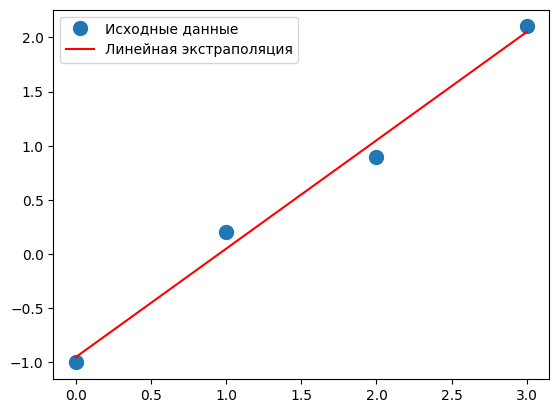

In [ ]:
# Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label ='Линейная экстраполяция')
plt.legend()
plt.show()

##1.1.2 Пример
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [ ]:
from numpy import *
from numpy.random import *

# Генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x **2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

# Записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# Читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-5.05835686 -4.2156928  -3.20841083 -2.44436977 -0.57235704  0.17579886
  1.09795266  1.90568378  2.73329629  4.12799827  5.14372454]
[24.8073701  15.89084814  9.01035175  4.38905668  1.23578012  0.15102711
  0.50581855  3.71753966  9.19991002 16.46737952 24.85980398]


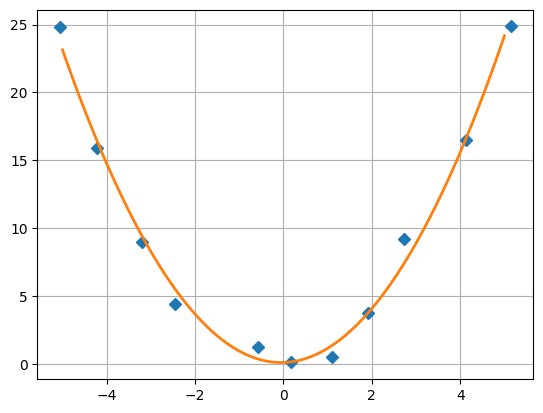

In [ ]:
# Нахождение коэффициенто функции вида y = ax^2+bx+c методом наименьших квадратов
# Задаем вектор , = [x**2, x , E]
m = vstack((x**2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y=ax^2+bx+c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+ s[2], '-', lw=2)
plt.grid()
plt.savefig('Парабола.png')

##1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

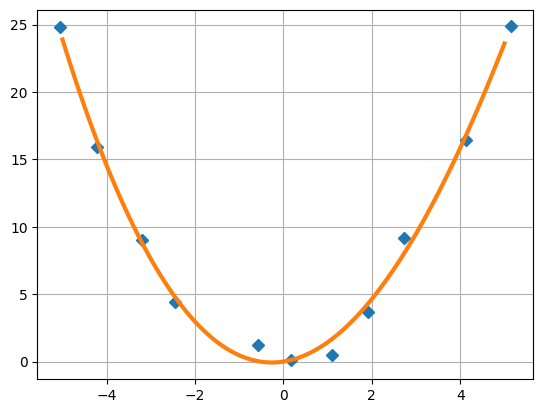

In [ ]:
# Нахождение коэффициенто функции вида y = ax^3+bx^2+cx+d методом наименьших квадратов
# Задаем вектор , = [x**3, x , E]
m = vstack((x**3, x**2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y=ax^3+b^2+c, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('Полином 3-й степени.png')

##Задание
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

[0 2 4 3]
[-1.   0.8  3.1  0.1]


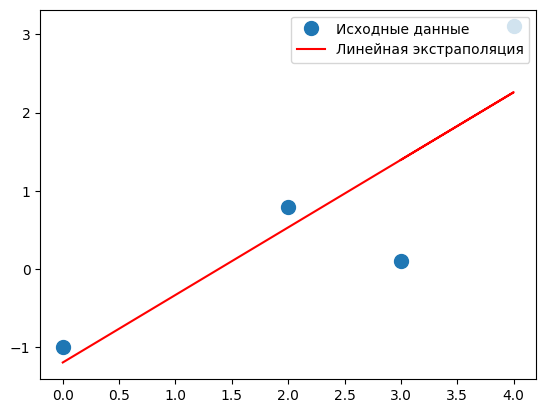

[-7.92861699 -5.927354   -4.64350412 -2.89537379 -1.48793302 -0.3675763
  1.31715019  2.72229214  5.08100985  6.74187249  7.52016261]
[64.35559694 41.05585215 23.42328376 10.64938584  2.81342534 -0.0896258
  2.30117253 10.36145637 22.60130472 41.34669402 64.10248619]


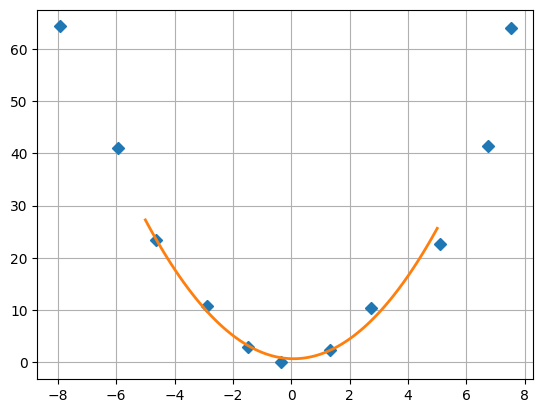

[-8.29638041 -6.81310455 -5.02446609 -3.89548079 -1.66269118 -0.31439755
  1.02309583  2.36307517  3.85951272  5.68363962  7.17190975]
[63.87748825 40.57358597 22.07352282 10.13219     2.41900816 -0.80207933
  1.6151106   9.73661466 22.56592997 40.32345239 63.81213286]


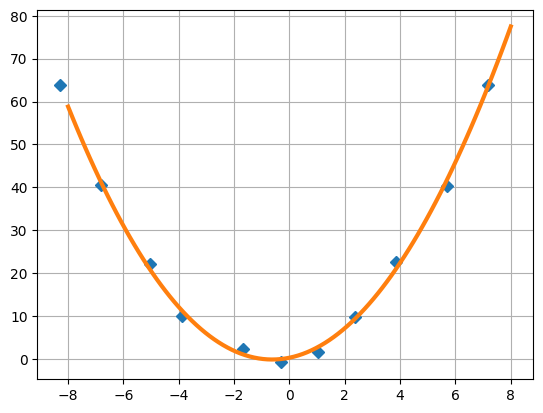

In [2]:
#первая степень
import numpy as np
from matplotlib import pyplot as plt

x = np.array([0, 2, 4, 3])
y = np.array([-1, 0.8, 3.1, 0.1])
print(x)
print(y)
A = np.vstack([x, np.ones(len(x))]).T
A
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend(loc=1)
plt.show()


#вторая степень
import numpy as np
from matplotlib import pyplot as plt
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-8,8,11)
y= x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
print(x)
print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()
plt.show()


#третья степень
import numpy as np
from matplotlib import pyplot as plt
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-8,8,11)
y= x**2+delta*(rand(11)-1)
x += delta*(rand(11)-1)
print(x)
print(y)

m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-8, 8, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 +s[1]*x_prec**2+s[2]*x_prec+s[3], '-', lw=3)
plt.grid()
plt.show()

##1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥
2
)


0.00016961047002170176
0.08601411122142054


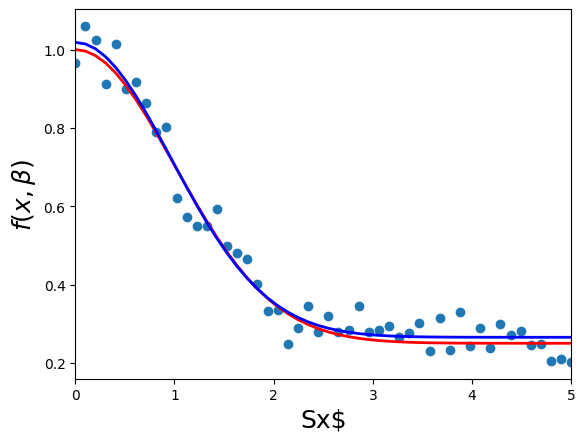

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.9647729  1.06038715 1.02566354 0.91276819 1.01315258 0.90032871
 0.91653033 0.86239693 0.7888401  0.80273989 0.62182219 0.57234252
 0.54966969 0.5497141  0.59268215 0.499012   0.48004704 0.46560089
 0.40223324 0.33213995 0.33624208 0.24712381 0.28924465 0.34468948
 0.27757653 0.31910253 0.27838934 0.28379659 0.34492794 0.27974215
 0.28417679 0.29433768 0.26598306 0.27508167 0.30260846 0.2294989
 0.31393212 0.23329191 0.32974847 0.242

In [3]:
import scipy as sp

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata u ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"Sx$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

## 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥

1.    𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2.   𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3.  𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4.  𝑓(𝑥, 𝑏) = 𝑏0 𝑥
𝑏1



[0.25647784 0.74784054]
0.0001726046728348825
0.15177307449959632


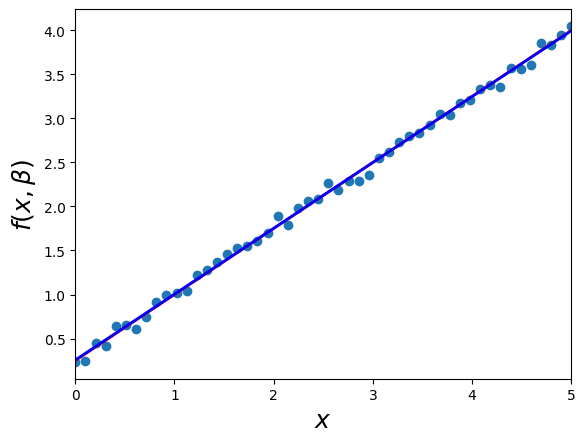

[0.27493377 0.73306989 0.50316138]
9.051026638726102e-05
0.07547608433798922


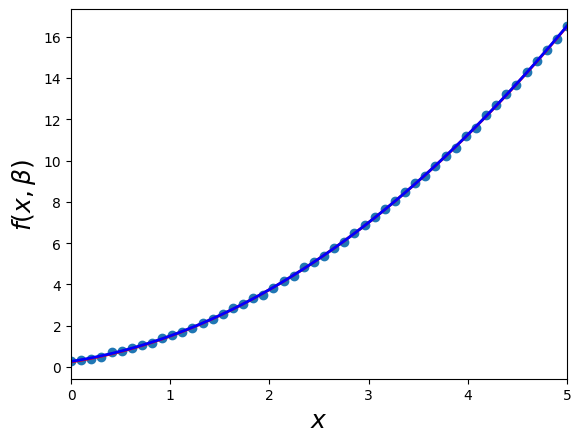

[0.97955188 2.02422774]
4.045730831178765e-05
0.09355515526455159


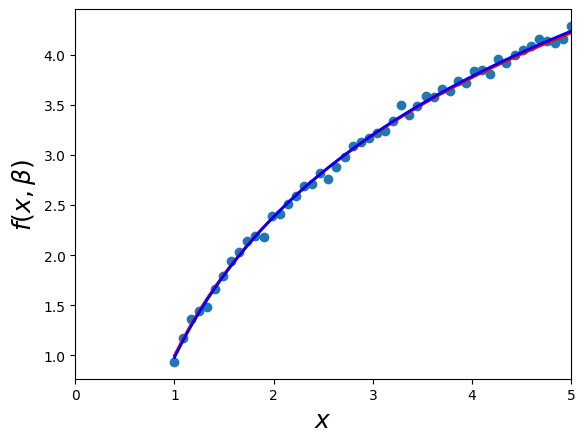

[0.99985579 2.00006339]
1.799989340940857e-06
0.17088803667351016


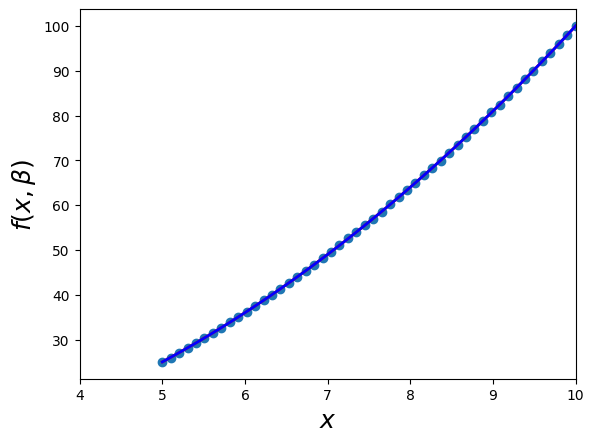

In [4]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + x * b1


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#2
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + x * b1 + x * x * b2


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#3
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()
#4
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(5, 10, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(4, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)", fontsize=18)
plt.show()

##Задание:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.


[1.0109532  0.29844359]
0.00018224797155241745
0.13492228878363427


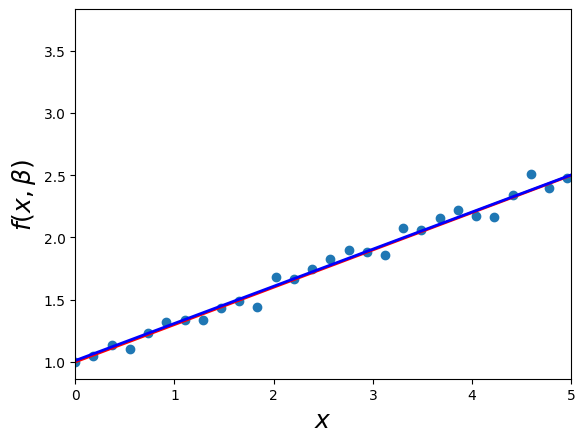

[1.00941657 0.30310123 0.89930605]
0.00021010368201548058
0.09887355741804964


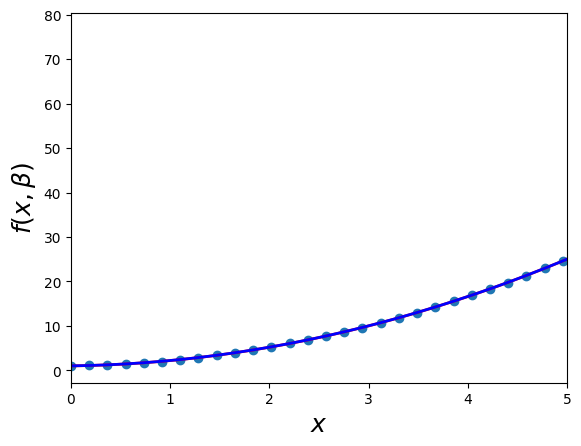

[1.00522441 7.99507114]
0.00016898176331348345
0.13586435223426938


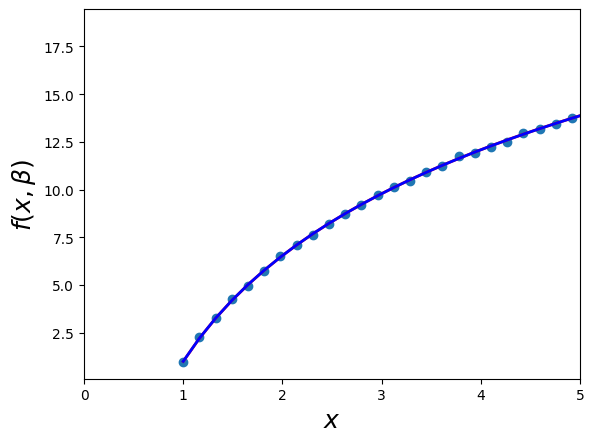

[0.99999998 8.00000001]
2.7592061323398127e-16
0.12870745123550212


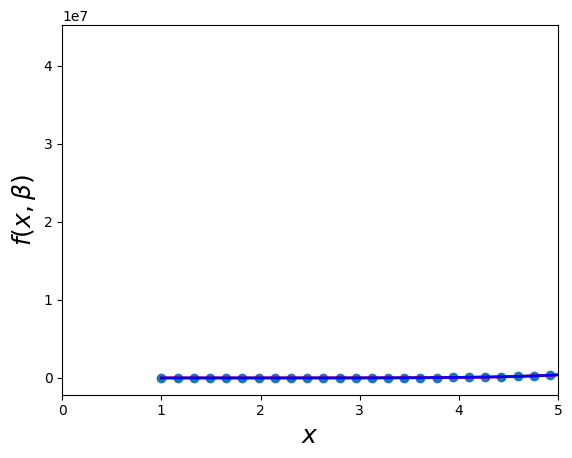

In [5]:
#Первая функция
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
beta = (1, 0.3)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Вторая функция
beta = (1, 0.3, 0.9)
def f(x, b0, b1, b2):
    return b0 + b1 * x+b2*x*x
xdata = np.linspace(0, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Третья функция
beta = (1, 8)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Четвертая функция
beta = (1, 8)
def f(x, b0, b1):
    return b0* x ** b1
xdata = np.linspace(1, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

##1.2.1 Пример
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn


In [7]:
#Импортируем необходимые библиотеки
#используем pandas и питру для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей. import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#создадим набор данных для описания взаимосбязи между временем обучения студентов и успебаемостью
my_dict = {"Учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.e0,5.50],
        "Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()
 

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [10]:
#Исследуем набор данных
print(dataset.shape)
dataset. describe()


(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


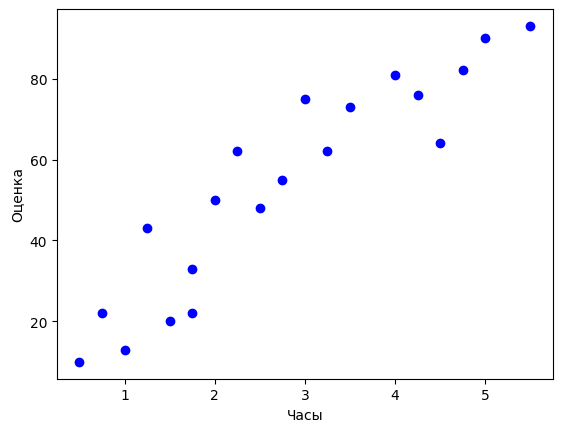

In [9]:
# Нарисуем точечную диаграмму
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)


[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [14]:
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набар тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [15]:
#приведем получившиеся коэффициенты для линии регрессии print(regressor.intercept
print(regressor.coef_)

[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [17]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


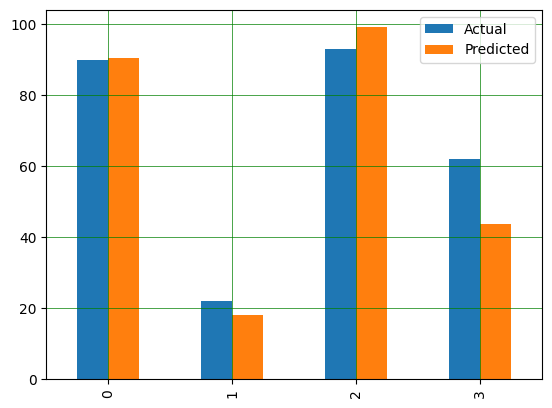

In [19]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


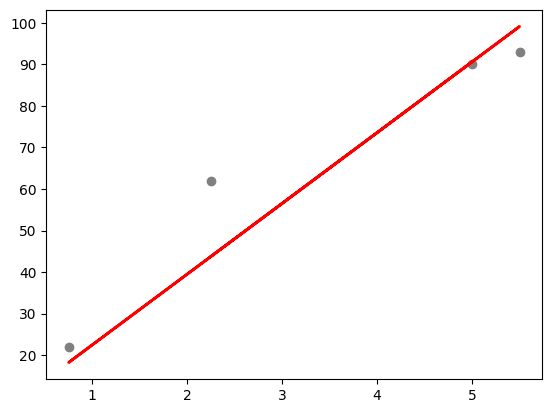

In [20]:
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

##Задание:

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]

LinearRegression()
26780.09915062818
[9312.57512673]


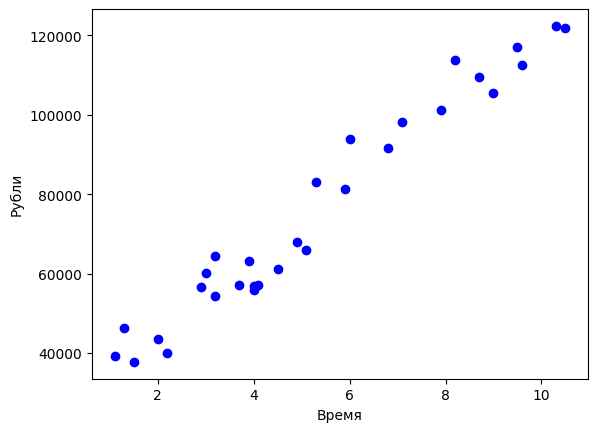

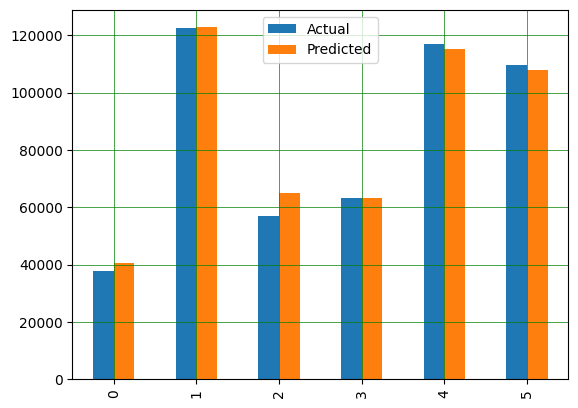

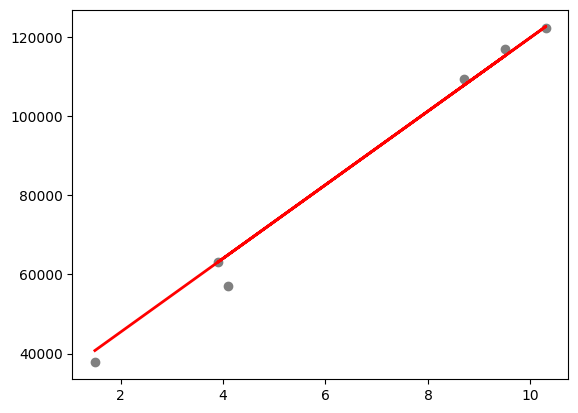

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7,
                               9.0, 9.5, 9.6, 10.3, 10.5],
           'Salary': [39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00,
                      113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00]
}
dataset = pd.DataFrame(my_dict)
display(dataset.head())
display(dataset.describe())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("\nLinearRegression()")
print(regressor.intercept_)
print(regressor.coef_)
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label='')
plt.xlabel("Время")
plt.ylabel("Рубли")
plt.show()
y_pred = regressor.predict(X_test)
df = pd. DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

##1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.


##1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq

In [23]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], 
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

##1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.


In [27]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance

from  sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from  sklearn import metrics


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,4,4,3,1,2,3,4,1,3,9,7]]




new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)


new_X = np.array(X)
new_X = new_X.transpose()

df2 = pd.DataFrame(new_X)

df1 = df1.rename(columns={0:'y'}, inplace= False)
df2 = df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace= False)

frames = [df1,df2]


dataset = pd.concat([df1,df2], axis=1,join="inner")
dataset.head()


print(dataset.head())

print(dataset.shape)
dataset.describe()

X= dataset[['x1','x2','x3']]
y = dataset['y']


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

regressor = LinearRegression()




regressor.fit(X_train,y_train)

coeff_df =  pd.DataFrame(regressor.coef_,X.columns, columns=["Coefficient"])
print(coeff_df)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
print(df)

print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
    Coefficient
x1     1.894737
x2    -4.052632
x3    -2.947368
    Actual  Predicted
11       5 -13.736842
10       4 -14.315789
21       3  -8.315789
14       4   3.157895
20       1  27.473684
1        2  25.789474
13       5  -0.052632
22       1  -6.473684
16       6   8.263158
8        5   5.157895
6        5  -9.421053
17       0  -2.789474
4        3   4.578947
2        3  22.578947
5        4  -4.315789
18       6  -9.789474
9        5  -9.947368
7        3  -8.842105
19       3  29.315789
Mean Squared Error: 218.14929289983965


##Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

(48, 5)

LinearRegression()
    Coefficient
x1    -0.000107
x2    -0.000152
x3     0.000211
x4    -0.005058
    Actual  Predicted
29     9.0   7.962130
4      8.0   9.252421
26     8.0   7.763302
30     7.0   7.481077
32     8.0   7.696914
37     7.0   7.003346
34     8.0   8.370428
40     7.0   7.885720
7      8.0   8.646102
10     8.0   7.527290


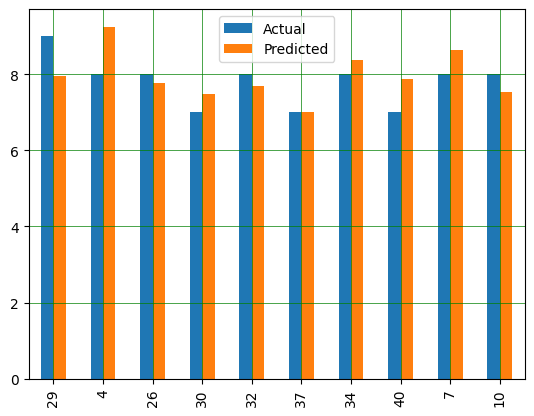

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from distributed import metrics
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = [9.00, 9.00, 9.00, 7.50, 8.00, 10.00, 8.00, 8.00, 8.00, 7.00, 8.00, 7.50, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 8.50, 7.00, 8.00, 9.00, 9.00, 8.50,
                               9.00, 8.00, 7.50, 8.00, 9.00, 7.00, 7.00, 8.00, 7.50, 8.00, 6.58, 5.00, 7.00, 8.50,
                               7.00, 7.00, 7.00, 7.00, 7.00, 6.00, 9.00, 7.00, 7.00]
X =  [[3571, 4092,3865, 4870, 4399, 5342, 5319, 5126, 4447,  4512, 4391, 5126, 4817, 4207, 4332, 4318,
      4206, 3718, 4716, 4341, 4593, 4983, 4897, 4258, 4574, 3721, 3448, 3846, 4188, 3601, 3640, 3333, 3063, 3357, 3528, 3802,
      4045, 3897, 3635, 4345, 4449, 3656, 4300, 3745, 5215, 4476, 4296, 5002],
     [1976, 1250, 1586, 2351, 431, 1333, 11868, 2138, 8577, 8507, 5939, 14186, 6930, 6580, 8159, 10340, 8508, 4725, 5915,
      6010, 7834, 602, 2449, 4686, 2619, 4746, 5399, 9061, 5975, 4650, 6905, 6594, 6524, 4121, 3495, 7834, 17782, 6385,
      3274, 3905, 4639, 3985, 3635, 2611, 2302, 3942, 4083, 9794],
     [5250, 5720, 5800, 5290, 5440, 5710, 4510, 5530, 5290, 5520, 5300, 5250, 5740, 5450, 6080, 5860, 5720, 5400, 7240,
      6770, 6630, 6020, 5110, 5170, 5510, 5440, 5480, 5790, 5630, 4930, 5180, 5130, 5780, 5470, 4870, 6290, 5660, 5860,
      6630, 6720, 6260, 5630, 6030, 5080, 6720, 5710, 6230, 5930],
     [541, 524, 561, 414, 410, 457, 344, 467, 464, 498, 580, 471, 525, 508, 566, 635, 603, 714, 865, 640, 649, 540, 464,
      547, 460, 566, 577, 631, 574, 534, 571, 554, 577, 628, 487, 644, 640, 704, 648, 968, 587, 699, 632, 591, 782, 510,
      610, 524]]
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns= {0:'y'}, inplace= False)
df2 = df2.rename(columns={0:'x1', 1:'x2', 2:'x3', 3:'x4'}, inplace=False)
frames=[df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()
print(dataset.shape)
dataset.describe()
X= dataset[['x1', 'x2', 'x3', 'x4']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("\nLinearRegression()")
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
y_pred = regressor.predict(X_test)
y_pred = regressor.predict(X_test)
df = pd. DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##Задание*
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

-0.4285714285714293 4.380952380952379


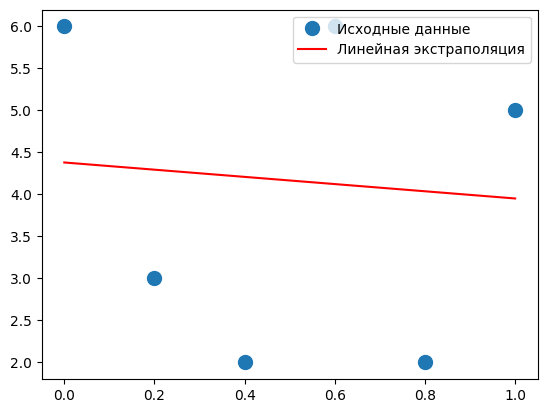

[0.  0.2 0.4 0.6 0.8 1. ]
[6. 3. 2. 6. 2. 5.]
-0.0023516 0.19277 -0.68789


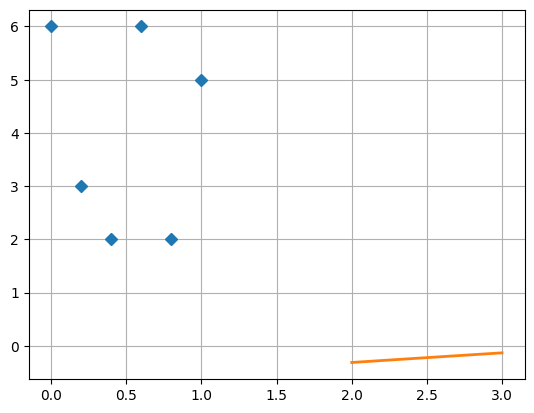

In [29]:
import numpy as np

x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [3.0, 6.0, 3.0, 6.0, 4.0, 3.0]
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A
m, c = np.linalg.lstsq(A, new_y, rcond=None)[0]
print(m, c)
import numpy as np

x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [6.0, 3.0, 2.0, 6.0, 2.0, 5.0]
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A
import matplotlib.pyplot as plt

plt.plot(new_x, new_y, 'o', label='Исходные данные', markersize=10)
plt.plot(new_x, m * new_x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()
from numpy import *
from numpy.random import *

print(new_x)
print(new_y)
m = vstack((new_x ** 2, new_x, ones(6))).T
s = np.linalg.lstsq(m, new_y, rcond=None)[0]
s = [-0.0023516, 0.19277, -0.68789]
x_prec = linspace(2, 3, 11)
plt.plot(new_x, new_y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
print(s[0], s[1], s[2])
plt.savefig('параболанов.png')